<a href="https://colab.research.google.com/github/Nanway/pug-vs-bulldog/blob/master/pug_vs_bulldog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pug Vs Bulldog recogniser**

In [1]:
# First we import our google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Import tensorflow etc
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
import tensorflow
print(tensorflow.test.gpu_device_name())

import os

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math

# Define constants
img_size = 224
base_dir = '/content/gdrive/My Drive/pug-vs-bulldog/'



/device:GPU:0


In [0]:
# Creates the image data generators to feed into our mode
# Apply data augmentation as well since we only have 500 of each 
def create_data_generators(batch_size):
  # Returns a train and validation generator

  pug = 'pug/'
  bulldog = 'bulldog/'
  
  train_dir = base_dir + 'train/'
  #train_pug_dir = train_dir + pug
  #train_bulldog_dir = train_dir + bulldog
  
  valid_dir = base_dir + 'validation/'
  #valid_pug_dir = valid_dir + pug
  #valid_bulldog_dir = valid_dir + bulldog

  train_generator = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)
  
  train_generator = train_generator.flow_from_directory(
      train_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      class_mode='binary')
  
  validation_gen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rescale=1./255)
  
  validation_gen = validation_gen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')
  
  return train_generator, validation_gen
  
  
  

In [0]:
# Build a transfer learning model with the resnet50
def build_model(num_dense_neurons, dropout_rate, optim): 
  resnet = ResNet50(weights='imagenet', include_top=False,
                    input_shape=(img_size, img_size, 3), pooling='max')
  tl_model = Sequential()
  tl_model.add(resnet)
  tl_model.add(Flatten())
  tl_model.add(Dense(num_dense_neurons, activation='relu'))
  tl_model.add(Dropout(dropout_rate))
  tl_model.add(Dense(1, activation='sigmoid'))
  tl_model.layers[0].trainable = False
  tl_model.compile(loss='binary_crossentropy',
                  optimizer=optim, metrics=['acc'])
  tl_model.summary()
  return tl_model

In [0]:
# Display training results
def display(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  # Plot accuracy
  plt.plot(epochs, acc, label='Train')
  plt.plot(epochs, val_acc, label='Validation')
  plt.title('Training and validation accuracy')
  plt.legend(loc='upper left')
  plt.figure()
  
  # Plot training and validation loss per epoch
  plt.plot(epochs, loss, label='Train')
  plt.plot(epochs, val_loss, label='Validation')
  plt.legend(loc='upper left')
  plt.title('Training and validation loss')
  

In [6]:
# Runner code
model = build_model(1024, 0.5, Adam(lr=0.0001))




94658560/94653016 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,686,913
Trainable params: 2,099,201
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
  # Create data generators
  batch_size = 20
  train_gen, valid_gen = create_data_generators(batch_size)

Found 968 images belonging to 2 classes.
Found 362 images belonging to 2 classes.


In [0]:
  # Train
  history = model.fit_generator(
    train_gen,
    steps_per_epoch = train_gen.samples/batch_size,
    validation_data= valid_gen,
    validation_steps = valid_gen.samples/batch_size,
    verbose=1,
    epochs=20)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


49/48 [==============================] - 42s 860ms/step - loss: 1.9803 - acc: 0.7158 - val_loss: 1.3033 - val_acc: 0.4972
Epoch 2/20
49/48 [==============================] - 35s 709ms/step - loss: 1.0101 - acc: 0.8419 - val_loss: 0.7329 - val_acc: 0.5304
Epoch 3/20
49/48 [==============================] - 35s 713ms/step - loss: 0.8207 - acc: 0.8679 - val_loss: 0.8253 - val_acc: 0.5055
Epoch 4/20
49/48 [==============================] - 35s 710ms/step - loss: 0.6789 - acc: 0.8903 - val_loss: 0.8211 - val_acc: 0.5304
Epoch 5/20
49/48 [==============================] - 35s 712ms/step - loss: 0.5241 - acc: 0.9092 - val_loss: 1.0843 - val_acc: 0.5055
Epoch 6/20
49/48 [==============================] - 35s 716ms/step - loss: 0.5165 - acc: 0.9011 - val_loss: 0.7512 - val_acc: 0.5580
Epoch 7/20
49/48 [==============================] - 35s 713ms/step - loss: 0.4921 - acc: 0.9062 - val_loss: 1.4706 - val_acc: 0.5083
Epoch 8/20
49/48 [==============================] - 35s 707ms/step - loss: 0.388

Training Parameters Log:

**Attempt 1**
- SGD learning rate =  0.0001
- Number of neurons = 1024
- Dropout = 0.5
- Batch Size = 20
- Final Validation Accuracy = 0.7155 (15 epochs)
- Final Train Accuracy = 0.8301

**Attempt 2**
- Adam learning rate = 0.0001
- Neurons = 1024
- Dropout = 0.5
- Batch Size = 20
- Final Validation Accuracy = 0.9365 (20 epochs)
- Final Train Accuracy = 0.9357



In [0]:
# Save the model
model.save(base_dir + 'trained_model.h5')



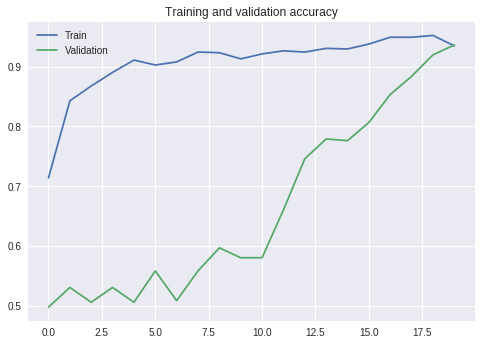

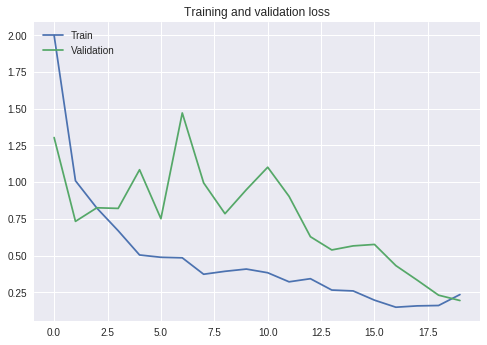

In [0]:
display(history)

In [8]:
# If model wasn't already loaded
model = tensorflow.keras.models.load_model(base_dir + 'trained_model.h5')

In [0]:


# Image loading for image prediction
def load_image(img_path):
    # Load image, convert to array, convert to resnet format, preprocess
    # using resnet preprocessor and then rescale
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = x/255
    return x

def load_images(img_dir):
  img_array = []
  fn_array = []
  for fn in os.listdir(img_dir):

    try:
      img_array.append(load_image(img_dir + fn))
      fn_array.append(img_dir + fn)
    except:
      print("Attempting to load")
      print(img_dir + fn)
  
  images = np.vstack(img_array)
  return images, fn_array

def make_predictions(test_dir, ncols):
  to_predict, fn_array = load_images(test_dir)
  preds = model.predict_classes(to_predict)
  pred_prob = model.predict(to_predict)
  
  # Generate a mapping
  class_to_num = train_gen.class_indices
  num_to_class = {v: k for k,v in class_to_num.items()}
  print(len(fn_array))
  # Plot the thing
  nrows = math.ceil(len(fn_array) / ncols)
  plt.figure(figsize=(150,150))
  for i, fn in enumerate(fn_array):
    img = mpimg.imread(fn_array[i])
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    plt.imshow(img)
    plot_title = ('I have reason to believe this is a '
                  + num_to_class[preds[i][0]] 
                  + ' with probability: ' + '%.4f' %
                  (pred_prob[i] if preds[i][0] == 1 else 1.0- pred_prob[i]))
    plt.title(plot_title)

  plt.show()

[[3.9992578e-05]
 [9.9999094e-01]
 [9.9202240e-01]
 [6.2221569e-01]
 [9.9080211e-01]
 [9.9993050e-01]
 [9.9994922e-01]
 [8.2589291e-02]
 [2.5221500e-01]
 [9.9999845e-01]
 [6.1456848e-02]
 [8.9055911e-06]
 [9.9985301e-01]
 [9.9999404e-01]
 [9.9999797e-01]
 [1.0749712e-01]
 [9.9988854e-01]
 [9.9987686e-01]
 [9.9999976e-01]
 [9.9813372e-01]
 [9.9861193e-01]
 [1.9078597e-02]
 [6.7596498e-05]
 [9.3542784e-01]
 [1.0962140e-06]
 [9.3907338e-01]
 [1.9901502e-06]
 [1.5152659e-02]
 [2.5920060e-02]
 [2.7161674e-04]
 [1.6706647e-01]
 [9.9579573e-01]
 [9.9929464e-01]
 [9.0248823e-01]]
34


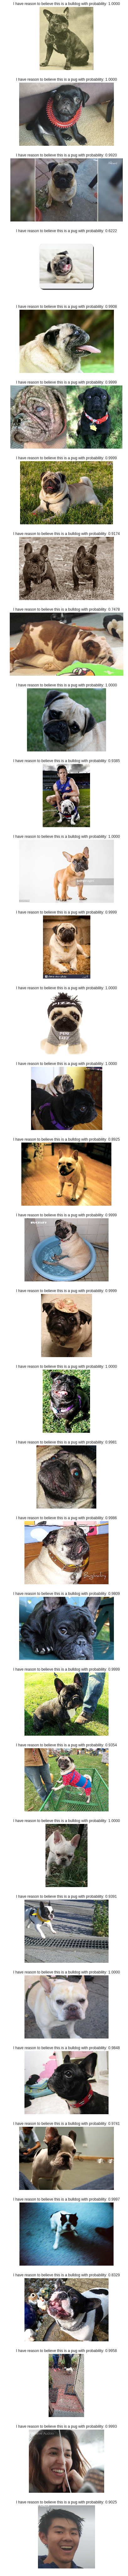

In [15]:
# Make predictions
test_dir = base_dir + 'test1/'
make_predictions(test_dir,1)

Of the 32 test images fed in, only 1-2 were misclassified (the jumping bulldog was misclassified as a pug and a plush toy was also classified correctly). I too am unsure whether one of the misclassified ones was a pug or a bulldog (one of the black pugs). These images were taken from the original web scrape and put into a separate folder (so as to avoid reusing training/ validation images). Also included a photo of myself and the friend who inspired me to make this project for the lols and it seems we were very strongly classified as pugs for some reason

